# Support Vector Machine Visualization

This notebook demonstrates Support Vector Machine (SVM) with different kernels and parameters. It visualizes:

1. RBF kernel with varying gamma parameters (using data from CSV file)
2. Linear kernel with varying C parameters (using data from CSV file)

The visualizations show decision boundaries, decision function values, and classification accuracies.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import svm

plt.style.use("ggplot")


# 0. Prerequist check output directory exists

In [28]:
import os

# Check if figures folder exists, if not create it
if not os.path.exists("./figures"):
    os.makedirs("./figures")
    print("Created 'figures' directory")
else:
    print("'figures' directory already exists")

'figures' directory already exists


## 1. Load data and plot observations

In [29]:
df = pd.read_csv("nonlinear_svm_data.csv")  # x, y, label
X = df[["x", "y"]].values

y = df["label"].values
y = 2 * y - 1  # Transforms 0->-1 and 1->+1

n_obs = X.shape[0]
print(f"Number of observations: {n_obs}")

Number of observations: 20


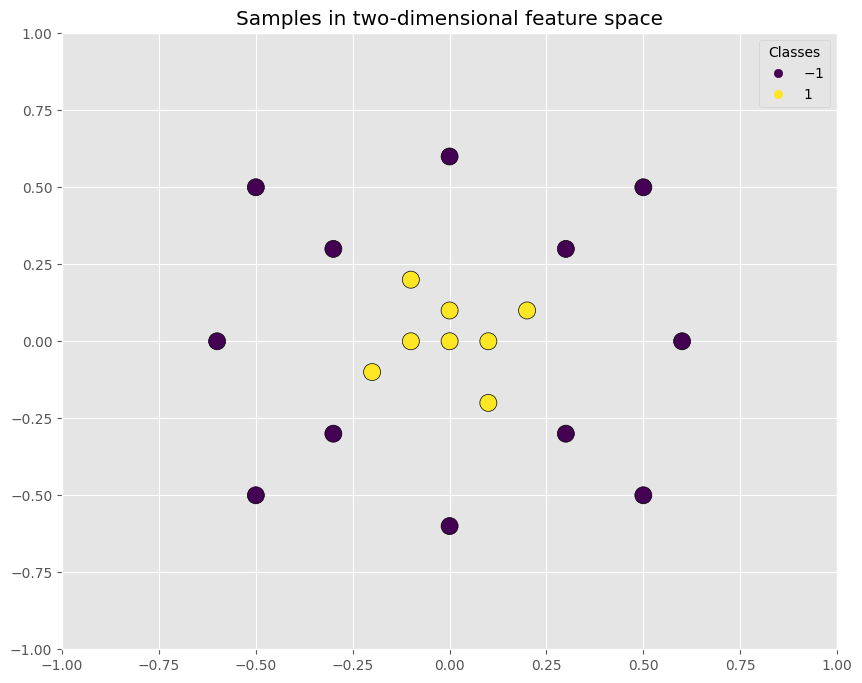

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
x_min, x_max, y_min, y_max = -1, 1, -1, 1
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
plt.savefig("./figures/nonlinear_svm_samples.pdf", dpi=600, bbox_inches="tight")
_ = plt.show()

## 2. Visualizing SVM with RBF Kernel

We'll now visualize SVM models using the RBF kernel with different values of parameter 'a' (which controls the gamma parameter). The gamma parameter determines the influence of a single training example. Low gamma means 'far' influence, high gamma means 'close' influence.

/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_59962/2526697988.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 0.9, 0.95])


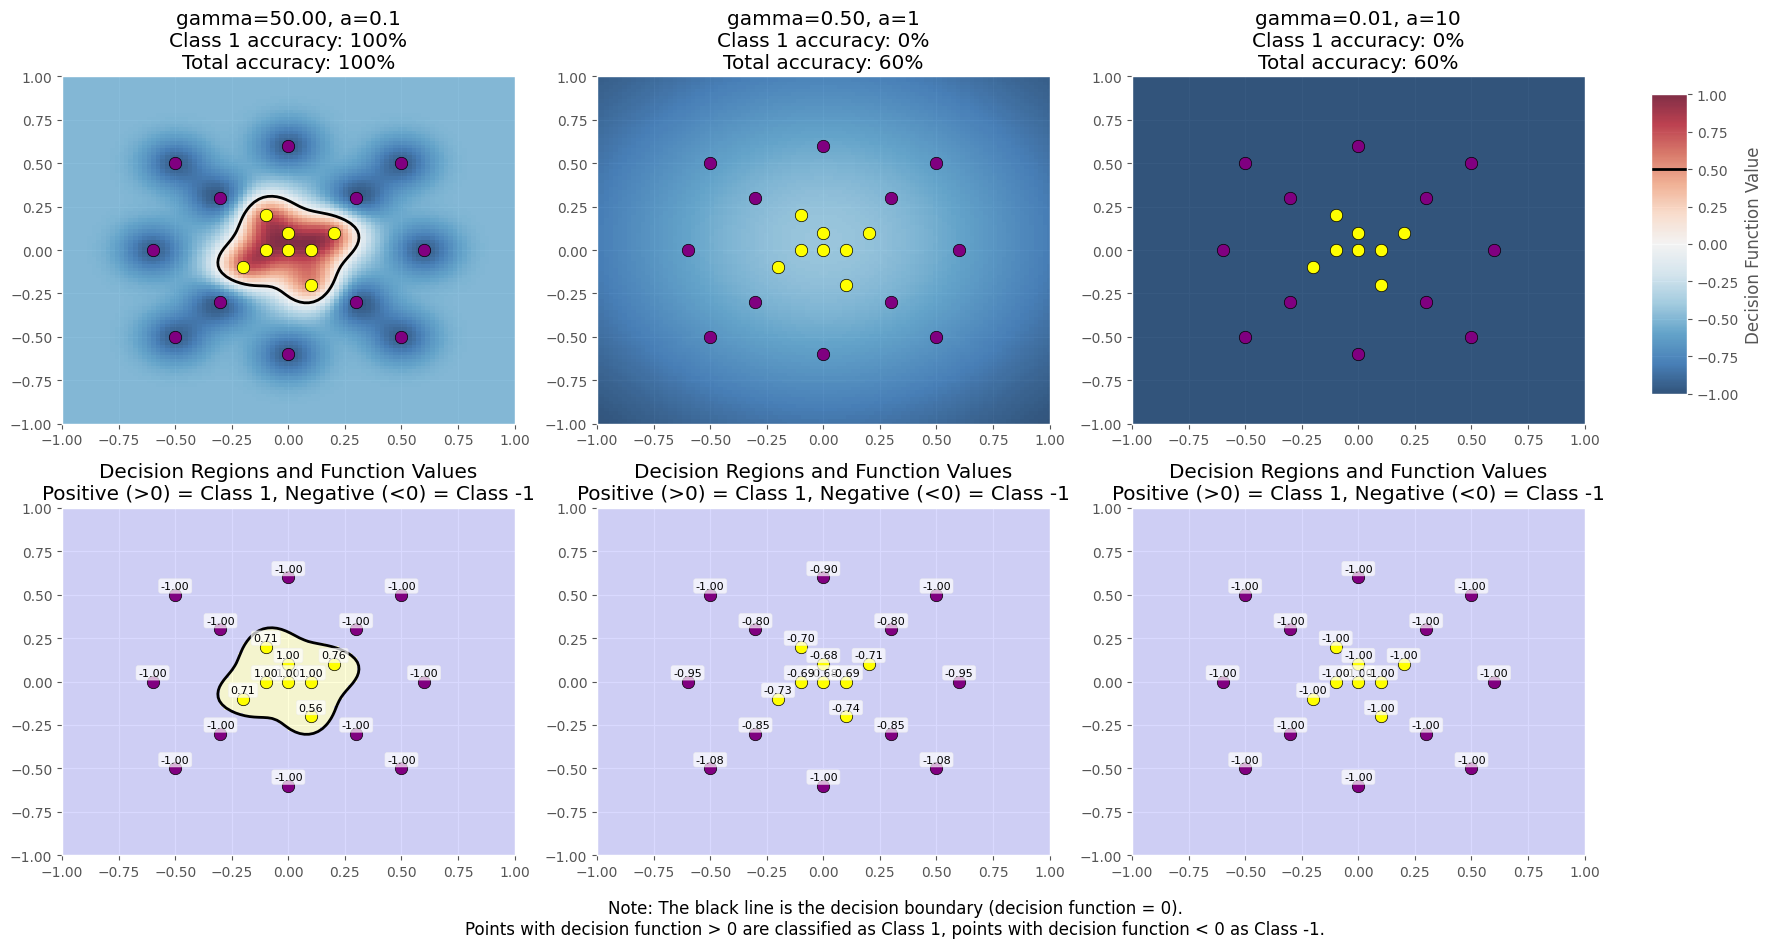

In [31]:
a_values = [0.1, 1, 10]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, a in enumerate(a_values):
    # Train SVM model
    gamma = 1.0 / (2.0 * a**2)
    model = svm.SVC(kernel="rbf", gamma=gamma, C=1)
    model.fit(X, y)

    # Calculate decision function values for all points
    decision_values = model.decision_function(X)

    # Create meshgrid for plotting
    xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot 1: Standard decision boundary with contour line at 0
    ax_top = axes[0, i]

    # Use a diverging colormap to clearly show positive/negative regions
    # RdBu_r: Blue for negative (class -1), Red for positive (class 1)
    im = ax_top.pcolormesh(
        xx,
        yy,
        Z,
        cmap=plt.cm.RdBu_r,
        alpha=0.8,
        vmin=-max(abs(Z.min()), abs(Z.max())),
        vmax=max(abs(Z.min()), abs(Z.max())),
    )

    # Add contour line at decision boundary (where decision function = 0)
    ax_top.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    # Plot data points
    ax_top.scatter(X[y == 1, 0], X[y == 1, 1], color="yellow", s=80, edgecolors="black")
    ax_top.scatter(
        X[y == -1, 0], X[y == -1, 1], color="purple", s=80, edgecolors="black"
    )

    # Calculate accuracy
    predictions = model.predict(X)
    class1_accuracy = np.mean(predictions[y == 1] == y[y == 1]) * 100
    total_accuracy = np.mean(predictions == y) * 100

    ax_top.set_title(
        f"gamma={gamma:.2f}, a={a}\nClass 1 accuracy: {class1_accuracy:.0f}%\nTotal accuracy: {total_accuracy:.0f}%"
    )
    ax_top.set_xlim([-1, 1])
    ax_top.set_ylim([-1, 1])

    # Plot 2: Show actual decision function values for each point
    ax_bottom = axes[1, i]

    # Show decision regions with a binary colormap
    binary_cmap = ListedColormap(["#C0C0FF", "#FFFFC0"])  # Light blue/yellow
    ax_bottom.pcolormesh(xx, yy, Z > 0, cmap=binary_cmap, alpha=0.6)

    # Add decision boundary line
    ax_bottom.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    # Plot the data points with their decision values
    for j, (x_coord, y_coord) in enumerate(X):
        true_class = "Class 1" if y[j] == 1 else "Class -1"
        pred_class = "Class 1" if decision_values[j] > 0 else "Class -1"
        color = "yellow" if y[j] == 1 else "purple"

        # Add colored point
        ax_bottom.scatter(x_coord, y_coord, color=color, s=80, edgecolors="black")

        # Add text showing decision value and prediction
        ax_bottom.text(
            x_coord,
            y_coord + 0.05,
            f"{decision_values[j]:.2f}",
            ha="center",
            va="center",
            fontsize=8,
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.2"),
        )

    ax_bottom.set_title(
        "Decision Regions and Function Values\nPositive (>0) = Class 1, Negative (<0) = Class -1"
    )
    ax_bottom.set_xlim([-1, 1])
    ax_bottom.set_ylim([-1, 1])

# Add explanatory text
fig.text(
    0.5,
    0.01,
    "Note: The black line is the decision boundary (decision function = 0).\n"
    "Points with decision function > 0 are classified as Class 1, points with decision function < 0 as Class -1.",
    ha="center",
    fontsize=12,
)

# Add a colorbar for the top row
cbar_ax = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Decision Function Value")

# Add a horizontal line at 0 on the colorbar
cbar.ax.axhline(y=0.5, color="k", linestyle="-", linewidth=2)

plt.tight_layout(rect=[0, 0.05, 0.9, 0.95])
plt.savefig("./figures/svm_decision_boundaries_rbf.png", dpi=600, bbox_inches="tight")
plt.show()

## 3. Visualizing SVM with Linear Kernel

We'll now visualize SVM models using the Linear kernel with different values of parameter 'C' (which controls the misclassification penalty).

/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_59962/717591253.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 0.9, 0.95])


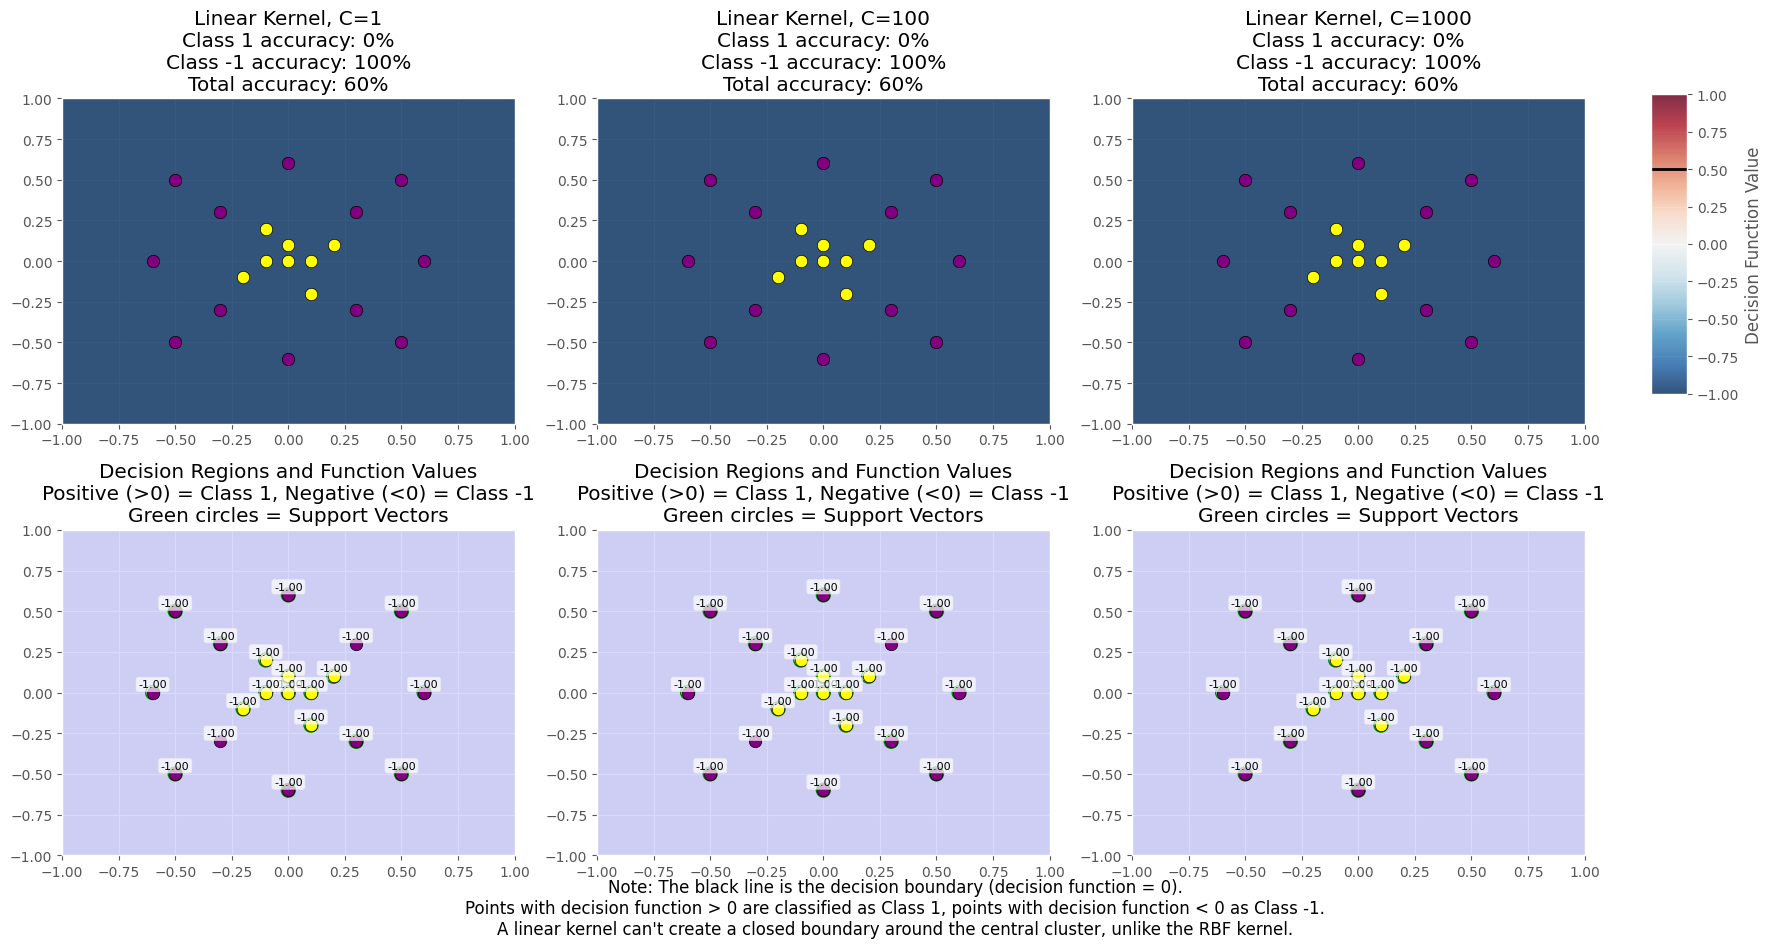

In [32]:
# Set up C values for linear kernel
C_values = [1, 100, 1000]

# Create plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, C in enumerate(C_values):
    # Train SVM model with linear kernel
    model = svm.SVC(kernel="linear", C=C)
    model.fit(X, y)

    # Calculate decision function values for all points
    decision_values = model.decision_function(X)

    # Create meshgrid for plotting
    xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot 1: Standard decision boundary with contour line at 0
    ax_top = axes[0, i]

    # Use a diverging colormap to clearly show positive/negative regions
    # RdBu_r: Blue for negative (class -1), Red for positive (class 1)
    im = ax_top.pcolormesh(
        xx,
        yy,
        Z,
        cmap=plt.cm.RdBu_r,
        alpha=0.8,
        vmin=-max(abs(Z.min()), abs(Z.max())),
        vmax=max(abs(Z.min()), abs(Z.max())),
    )

    # Add contour line at decision boundary (where decision function = 0)
    ax_top.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    # Plot data points
    ax_top.scatter(X[y == 1, 0], X[y == 1, 1], color="yellow", s=80, edgecolors="black")
    ax_top.scatter(
        X[y == -1, 0], X[y == -1, 1], color="purple", s=80, edgecolors="black"
    )

    # Calculate accuracy
    predictions = model.predict(X)
    class1_accuracy = np.mean(predictions[y == 1] == y[y == 1]) * 100
    class2_accuracy = np.mean(predictions[y == -1] == y[y == -1]) * 100
    total_accuracy = np.mean(predictions == y) * 100

    ax_top.set_title(
        f"Linear Kernel, C={C}\nClass 1 accuracy: {class1_accuracy:.0f}%\n"
        f"Class -1 accuracy: {class2_accuracy:.0f}%\n"
        f"Total accuracy: {total_accuracy:.0f}%"
    )
    ax_top.set_xlim([-1, 1])
    ax_top.set_ylim([-1, 1])

    # Plot 2: Show actual decision function values for each point
    ax_bottom = axes[1, i]

    # Show decision regions with a binary colormap
    binary_cmap = ListedColormap(["#C0C0FF", "#FFFFC0"])  # Light blue/yellow
    ax_bottom.pcolormesh(xx, yy, Z > 0, cmap=binary_cmap, alpha=0.6)

    # Add decision boundary line
    ax_bottom.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    # Highlight support vectors
    support_vectors = model.support_vectors_
    ax_bottom.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="green",
    )

    # Plot the data points with their decision values
    for j, (x_coord, y_coord) in enumerate(X):
        true_class = "Class 1" if y[j] == 1 else "Class -1"
        pred_class = "Class 1" if decision_values[j] > 0 else "Class -1"
        color = "yellow" if y[j] == 1 else "purple"

        # Add colored point
        ax_bottom.scatter(x_coord, y_coord, color=color, s=80, edgecolors="black")

        # Add text showing decision value and prediction
        ax_bottom.text(
            x_coord,
            y_coord + 0.05,
            f"{decision_values[j]:.2f}",
            ha="center",
            va="center",
            fontsize=8,
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.2"),
        )

    ax_bottom.set_title(
        "Decision Regions and Function Values\nPositive (>0) = Class 1, Negative (<0) = Class -1\nGreen circles = Support Vectors"
    )
    ax_bottom.set_xlim([-1, 1])
    ax_bottom.set_ylim([-1, 1])

# Add explanatory text
fig.text(
    0.5,
    0.01,
    "Note: The black line is the decision boundary (decision function = 0).\n"
    "Points with decision function > 0 are classified as Class 1, points with decision function < 0 as Class -1.\n"
    "A linear kernel can't create a closed boundary around the central cluster, unlike the RBF kernel.",
    ha="center",
    fontsize=12,
)

# Add a colorbar for the top row
cbar_ax = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Decision Function Value")

# Add a horizontal line at 0 on the colorbar
cbar.ax.axhline(y=0.5, color="k", linestyle="-", linewidth=2)

plt.tight_layout(rect=[0, 0.05, 0.9, 0.95])
plt.savefig(
    "./figures/svm_decision_boundaries_linear.png", dpi=600, bbox_inches="tight"
)
plt.show()